<a href="https://colab.research.google.com/github/ecuadrafoy/PracticalMachineLearning/blob/master/Hyperparameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Homework

1. Choose 4 hyperparameters we have learned about in class
2. Create lists of the different options of hyperparameters
3. Randomly sample from those lists and train a Keras model on Fashion - MNIST
4. Display the different loss and accuracy curves using matplotlib
** train at least 10 different models

In [ ]:
# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display, HTML

In [ ]:
#importing packages
import tensorflow.keras
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd



*   `train_images` and `train_labels` arrays are the training set. 
*   Model is tested aganst the test set
* Each image is mapped toa  single label, the tensorflow website provides information on the labels



In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images,test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
#Exploring the data
print(train_images.shape, len(train_labels), test_images.shape, len(test_labels), sep='\n')

(60000, 28, 28)
60000
(10000, 28, 28)
10000


Preprocessing the data allows to scale values to a  range of 0 to 1. This can be done by dividing the values by 255

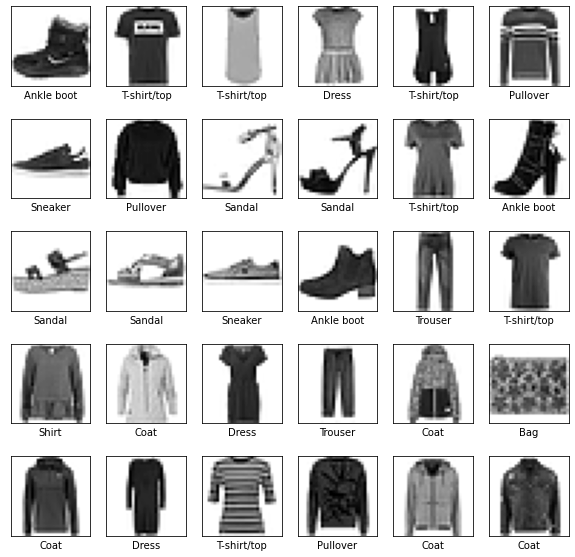

In [ ]:
#Preprocessing the data before training the network

train_images = train_images / 255.0

test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show();

# Models

In [ ]:
from keras.models import Model, Sequential
from tensorflow.keras.utils import plot_model
from keras.layers import Input,Dense,Flatten, BatchNormalization, Dropout
from keras.layers.merge import concatenate
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adam, SGD

## Model 1: A Great Model?
* For some strange reason, using this format of `Sequential()` gave me good accuracy values that I was unable to reproduce using functional APIs no matter how much I tweak with the preprocessing or any other values that are easy to access. 
* If I try `Sequential()` and then do `model.add`, to add layers it also doesnt give me the same output. 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


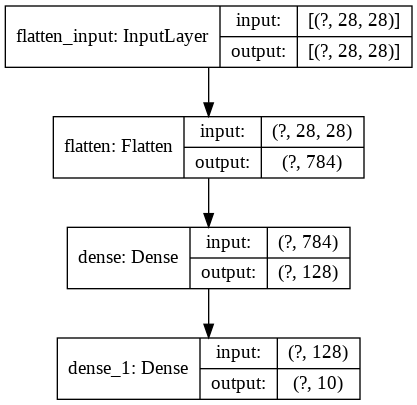

In [ ]:
K.clear_session()
model = keras.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Summarization

print(model.summary())
#Plotting the model

plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
h = model.fit(train_images, train_labels, validation_data = (test_images,test_labels), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7205 - accuracy: 0.7480 - val_loss: 1.6973 - val_accuracy: 0.7657
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6770 - accuracy: 0.7856 - val_loss: 1.6785 - val_accuracy: 0.7841
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6663 - accuracy: 0.7958 - val_loss: 1.6667 - val_accuracy: 0.7958
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6602 - accuracy: 0.8019 - val_loss: 1.6818 - val_accuracy: 0.7797
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6557 - accuracy: 0.8059 - val_loss: 1.6638 - val_accuracy: 0.7969
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6518 - accuracy: 0.8096 - val_loss: 1.6605 - val_accuracy: 0.8009
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6491 - accuracy: 0.8122 - val_loss: 1.6578 - val_accuracy:

313/313 - 0s - loss: 1.6538 - accuracy: 0.8073

Test accuracy: 0.8072999715805054


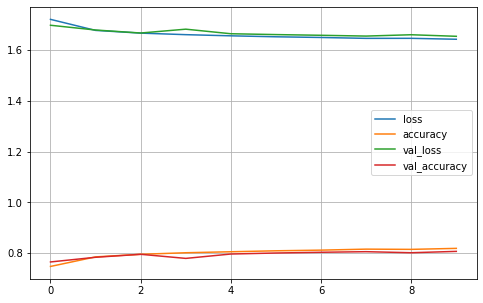

In [ ]:
#Evaluating accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest accuracy:', test_acc)

pd.DataFrame(h.history).plot(figsize=(8,5), ls='-')
plt.grid(True)
plt.gca()
plt.show()

## Model 2: Training a very basic functional model with no changes in hyperparameters



*   The functional model consists of a visible layer that takes the images that are 28x28 pixels 
* A second layers flattens the photos into 784 pixes that can be taken to two separate dense layers, both with 64 connections. these two layers are then concatenated into one and then put in a hidden layer with 20 connections.
* The metrics at the bottom, tell us that this neural network provides us with terrible accuracy values





Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten (Flatten)               (None, 784)          0           input_1[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 64)           50240       flatten[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 64)           50240       flatten[0][0]                    
______________________________________________________________________________________________

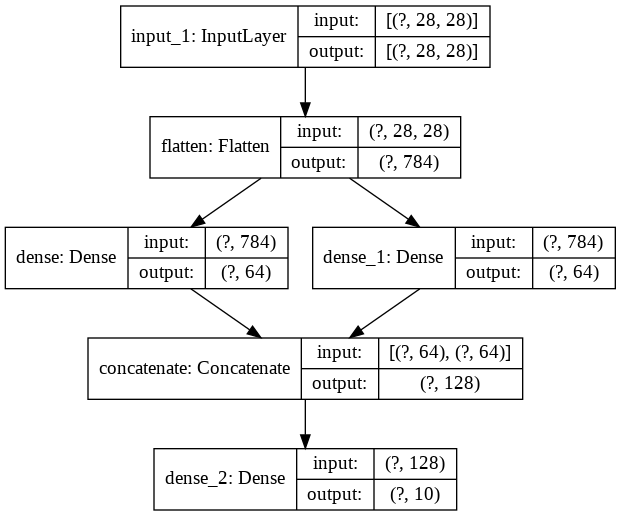

In [ ]:
K.clear_session()
#Creating a model on a functional API

#Input layer
visible = tensorflow.keras.layers.Input(shape=[28,28])
#flatten layer, converts 28x28 to 784 pixels
flat = tensorflow.keras.layers.Flatten()(visible)
#First Dense Layer
hidden1 = tensorflow.keras.layers.Dense(64, activation = 'relu')(flat)

#second dense layer
hidden2 = tensorflow.keras.layers.Dense(64, activation='relu')(flat)

#concatenate both hidden layers
merge = tensorflow.keras.layers.concatenate([hidden1, hidden2])

#output layer
output = tensorflow.keras.layers.Dense(10, activation='softmax')(merge)
#Final model
model1 = tensorflow.keras.Model(inputs=visible, outputs=output)
#Summarization
print(model1.summary())
#Plotting the model
plot_model(model1, to_file='model1.png', show_shapes=True)

In [ ]:

model1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  optimizer=Adam(),
                  metrics=['accuracy'])

h1 = model1.fit(train_images, train_labels, validation_data=(train_images,train_labels), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7979 - accuracy: 0.6682 - val_loss: 1.7839 - val_accuracy: 0.6776
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7664 - accuracy: 0.6938 - val_loss: 1.7542 - val_accuracy: 0.7052
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7567 - accuracy: 0.7027 - val_loss: 1.7535 - val_accuracy: 0.7058
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7502 - accuracy: 0.7084 - val_loss: 1.7551 - val_accuracy: 0.7042
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7451 - accuracy: 0.7133 - val_loss: 1.7428 - val_accuracy: 0.7159
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7418 - accuracy: 0.7166 - val_loss: 1.7392 - val_accuracy: 0.7192
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7402 - accuracy: 0.7179 - val_loss: 1.7337 - val_accuracy:

313/313 - 0s - loss: 1.6586 - accuracy: 0.8026

Test accuracy: 0.8026000261306763


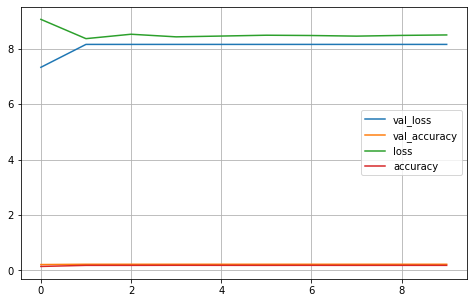

In [ ]:
#Evaluating accuracy
test_loss, test_acc = model1.evaluate(test_images, test_labels, verbose = 2)
print('\nTest accuracy:', test_acc)

pd.DataFrame(history1.history).plot(figsize=(8,5), ls='-')
plt.grid(True)
plt.gca()
plt.show()

## Model 3: Training the same functional model with tuned learning rates


*   The 4 hyperparameters I chose were learning rate, batch sizes, optimizers and initializers
*   It seems that a learning rate of 0.001 performs pretty well.




In [ ]:
#learning_rates = [0.001, 0.01, 0.05, 1]
lrlist = []


learning_rates = [0.001,0.01, 0.05, 1]

#K.clear_session()
for lr in learning_rates:

  K.clear_session() #IMPORTANT TO ADD 
  #Input layer
  visible = tensorflow.keras.layers.Input(shape=[28,28])
  #flatten layer, converts 28x28 to 784 pixels
  flat = tensorflow.keras.layers.Flatten()(visible)
  #First Dense Layer
  hidden1 = tensorflow.keras.layers.Dense(64, activation = 'relu')(flat)

  #second dense layer
  hidden2 = tensorflow.keras.layers.Dense(64, activation='relu')(flat)

  #concatenate both hidden layers
  merge = tensorflow.keras.layers.concatenate([hidden1, hidden2])

  #output layer
  output = tensorflow.keras.layers.Dense(10, activation = 'softmax')(merge)
  #Final model
  m3 = tensorflow.keras.Model(inputs=visible, outputs=output)

  m3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  optimizer=Adam(learning_rate=lr),
                  metrics=['accuracy'])
  
  h3 = m3.fit(train_images,train_labels, epochs = 10, validation_data = (test_images, test_labels))
  lrlist.append(pd.DataFrame(h3.history, index=h3.epoch))




Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7739 - accuracy: 0.6935 - val_loss: 1.7504 - val_accuracy: 0.7141
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7436 - accuracy: 0.7185 - val_loss: 1.7426 - val_accuracy: 0.7184
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7353 - accuracy: 0.7260 - val_loss: 1.7394 - val_accuracy: 0.7219
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7298 - accuracy: 0.7313 - val_loss: 1.7337 - val_accuracy: 0.7261
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7001 - accuracy: 0.7616 - val_loss: 1.6645 - val_accuracy: 0.7952
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6537 - accuracy: 0.8081 - val_loss: 1.6692 - val_accuracy: 0.7922
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6499 - accuracy: 0.8112 - val_loss: 1.6583 - val_accuracy:

In [ ]:
lrdf = pd.concat(lrlist, axis=1)

lr_metrics = lrlist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, lr_metrics],
                                 names = ['learning_rate', 'metrics'])
lrdf.columns = idx

lrdf


learning_rate     0.001                      ...     1.000                       
metrics            loss  accuracy  val_loss  ...  accuracy  val_loss val_accuracy
0              1.773886  0.693517  1.750407  ...  0.099333  2.361142          0.1
1              1.743587  0.718483  1.742594  ...  0.100000  2.361142          0.1
2              1.735290  0.726000  1.739382  ...  0.100000  2.361142          0.1
3              1.729845  0.731317  1.733712  ...  0.100000  2.361142          0.1
4              1.700134  0.761550  1.664472  ...  0.100000  2.361142          0.1
5              1.653690  0.808067  1.669213  ...  0.100000  2.361142          0.1
6              1.649853  0.811200  1.658312  ...  0.100000  2.361142          0.1
7              1.646069  0.815233  1.653157  ...  0.100000  2.361142          0.1
8              1.644374  0.816983  1.654511  ...  0.100000  2.361142          0.1
9              1.641788  0.819350  1.650099  ...  0.100000  2.361142          0.1

[10 rows x 16 columns]

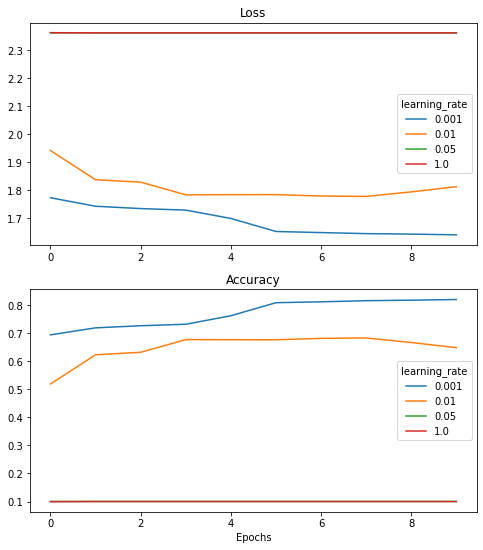

313/313 [==============================] - 0s 1ms/step - loss: 2.3611 - accuracy: 0.1000

Test accuracy: 0.10000000149011612


In [ ]:
ax = plt.subplot(211)
lrdf.xs('loss', axis=1, level='metrics').plot(ax=ax,figsize=(8, 9), ls='-')
plt.title("Loss")

ax = plt.subplot(212)
lrdf.xs('accuracy', axis=1, level='metrics').plot(ax=ax,figsize=(8, 9), ls='-')
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.show()

test_loss, test_acc = m3.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc);

## Model 4, tuning the batch size

*  For this model I'm alternating batch sizes
* A batch size of 64 appears to perform relatively well and quick compared to the other settings. Batch size of 2 was about 50 seconds per epoch compared to 3s/epoch at 64 batch.

In [ ]:
K.clear_session()

blist = []


batch_sizes = [2, 4, 8, 16, 32, 64]

#K.clear_session()
for batch_size in batch_sizes:

  K.clear_session() #IMPORTANT TO ADD 
  #Input layer
  visible = tensorflow.keras.layers.Input(shape=[28,28])
  #flatten layer, converts 28x28 to 784 pixels
  flat = tensorflow.keras.layers.Flatten()(visible)
  #First Dense Layer
  hidden1 = tensorflow.keras.layers.Dense(64, activation = 'relu')(flat)

  #second dense layer
  hidden2 = tensorflow.keras.layers.Dense(64, activation='relu')(flat)

  #concatenate both hidden layers
  merge = tensorflow.keras.layers.concatenate([hidden1, hidden2])

  #output layer
  output = tensorflow.keras.layers.Dense(10, activation = 'softmax')(merge)
  #Final model
  m4 = tensorflow.keras.Model(inputs=visible, outputs=output)

  m4.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  optimizer=Adam(),
                  metrics=['accuracy'])
  
  h4 = m4.fit(train_images,train_labels, epochs = 10, batch_size=batch_size, validation_data = (test_images, test_labels))
  blist.append(pd.DataFrame(h4.history, index=h4.epoch))

Epoch 1/10
30000/30000 [==============================] - 54s 2ms/step - loss: 1.7244 - accuracy: 0.7364 - val_loss: 1.7194 - val_accuracy: 0.7410
Epoch 2/10
30000/30000 [==============================] - 51s 2ms/step - loss: 1.6962 - accuracy: 0.7641 - val_loss: 1.7067 - val_accuracy: 0.7542
Epoch 3/10
30000/30000 [==============================] - 52s 2ms/step - loss: 1.6917 - accuracy: 0.7688 - val_loss: 1.6940 - val_accuracy: 0.7673
Epoch 4/10
30000/30000 [==============================] - 53s 2ms/step - loss: 1.6836 - accuracy: 0.7771 - val_loss: 1.6928 - val_accuracy: 0.7680
Epoch 5/10
30000/30000 [==============================] - 52s 2ms/step - loss: 1.6824 - accuracy: 0.7783 - val_loss: 1.6812 - val_accuracy: 0.7796
Epoch 6/10
30000/30000 [==============================] - 53s 2ms/step - loss: 1.6828 - accuracy: 0.7779 - val_loss: 1.7048 - val_accuracy: 0.7558
Epoch 7/10
30000/30000 [==============================] - 53s 2ms/step - loss: 1.6815 - accuracy: 0.7793 - val_loss: 1

In [ ]:
bdf = pd.concat(blist, axis=1)

b_metrics = blist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, b_metrics],
                                 names = ['Batch Size', 'Metrics'])
bdf.columns = idx

bdf

Batch Size        2                       ...        64                       
Metrics         loss  accuracy  val_loss  ...  accuracy  val_loss val_accuracy
0           1.724400  0.736383  1.719403  ...  0.799667  1.635388       0.8315
1           1.696223  0.764133  1.706719  ...  0.845250  1.619822       0.8448
2           1.691686  0.768783  1.693965  ...  0.855833  1.616419       0.8463
3           1.683584  0.777067  1.692786  ...  0.862233  1.611537       0.8516
4           1.682381  0.778317  1.681187  ...  0.868433  1.613357       0.8493
5           1.682788  0.777933  1.704782  ...  0.873217  1.620725       0.8418
6           1.681455  0.779333  1.689272  ...  0.875950  1.602861       0.8592
7           1.674441  0.786333  1.691526  ...  0.879667  1.599780       0.8623
8           1.674449  0.786300  1.683537  ...  0.883533  1.604275       0.8575
9           1.673930  0.786850  1.677706  ...  0.884783  1.596373       0.8654

[10 rows x 24 columns]

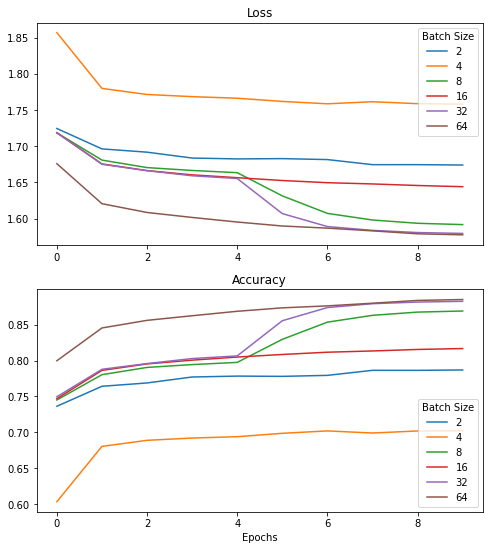

313/313 [==============================] - 0s 1ms/step - loss: 1.5964 - accuracy: 0.8654

Test accuracy: 0.8654000163078308


In [ ]:
ax = plt.subplot(211)
bdf.xs('loss', axis=1, level='Metrics').plot(ax=ax,figsize=(8, 9), ls='-')
plt.title("Loss")

ax = plt.subplot(212)
bdf.xs('accuracy', axis=1, level='Metrics').plot(ax=ax,figsize=(8, 9), ls='-')
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.show()

test_loss, test_acc = m4.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc);

## Model 5: Varying Optimizers

* While we use `Adam()` a lot I wanted to see if other optimizers would work as well.
* I noticed that `RMSprop()` performed extremely well, almost as good as `Adam()` with better accuracy

In [ ]:
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop

K.clear_session()

olist = []

optimizers = ['SGD()',  
              'Adam()',
              'Adagrad()',
              'RMSprop()']

#K.clear_session()
for opt_name in optimizers:

  K.clear_session() #IMPORTANT TO ADD 
  #Input layer
  visible = tensorflow.keras.layers.Input(shape=[28,28])
  #flatten layer, converts 28x28 to 784 pixels
  flat = tensorflow.keras.layers.Flatten()(visible)
  #First Dense Layer
  hidden1 = tensorflow.keras.layers.Dense(64, activation = 'relu')(flat)

  #second dense layer
  hidden2 = tensorflow.keras.layers.Dense(64, activation='relu')(flat)

  #concatenate both hidden layers
  merge = tensorflow.keras.layers.concatenate([hidden1, hidden2])

  #output layer
  output = tensorflow.keras.layers.Dense(10, activation = 'softmax')(merge)
  #Final model
  m5 = tensorflow.keras.Model(inputs=visible, outputs=output)

  m5.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
  
  h5 = m5.fit(train_images,train_labels, epochs = 10, validation_data = (test_images, test_labels))
  olist.append(pd.DataFrame(h5.history, index=h5.epoch))


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0189 - accuracy: 0.4840 - val_loss: 1.9132 - val_accuracy: 0.5793
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.8875 - accuracy: 0.5969 - val_loss: 1.8735 - val_accuracy: 0.6057
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8420 - accuracy: 0.6544 - val_loss: 1.8252 - val_accuracy: 0.6734
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.8062 - accuracy: 0.6864 - val_loss: 1.8024 - val_accuracy: 0.6857
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7890 - accuracy: 0.6960 - val_loss: 1.7905 - val_accuracy: 0.6920
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7790 - accuracy: 0.7022 - val_loss: 1.7820 - val_accuracy: 0.6959
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7721 - accuracy: 0.7058 - val_loss: 1.7768 - val_accuracy:

In [ ]:
odf = pd.concat(olist, axis=1)

o_metrics = blist[0].columns
idx = pd.MultiIndex.from_product([optimizers, b_metrics],
                                 names = ['Optimizer', 'Metrics'])
odf.columns = idx

odf

Optimizer     SGD()                      ... RMSprop()                       
Metrics        loss  accuracy  val_loss  ...  accuracy  val_loss val_accuracy
0          2.018931  0.484033  1.913163  ...  0.801617  1.640857       0.8219
1          1.887462  0.596883  1.873523  ...  0.840333  1.625064       0.8362
2          1.841969  0.654417  1.825198  ...  0.851433  1.617626       0.8448
3          1.806224  0.686367  1.802406  ...  0.858200  1.608948       0.8521
4          1.789014  0.695983  1.790529  ...  0.861983  1.608964       0.8518
5          1.778979  0.702233  1.782014  ...  0.865850  1.616928       0.8444
6          1.772135  0.705817  1.776818  ...  0.869233  1.602998       0.8583
7          1.767177  0.708900  1.774068  ...  0.870900  1.605768       0.8548
8          1.763127  0.711300  1.769399  ...  0.874933  1.597033       0.8641
9          1.759860  0.713417  1.766601  ...  0.876083  1.602409       0.8580

[10 rows x 16 columns]

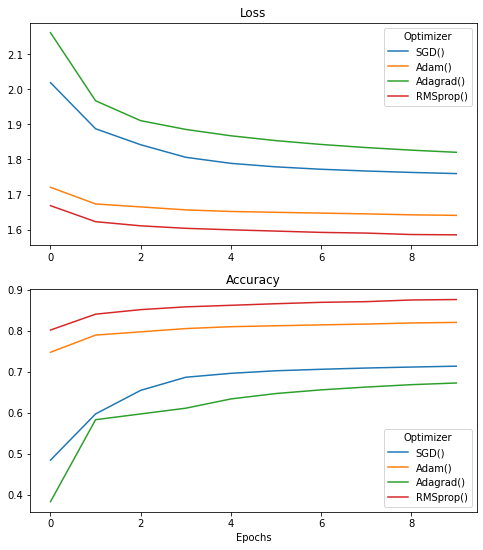

313/313 [==============================] - 0s 1ms/step - loss: 1.5964 - accuracy: 0.8654

Test accuracy: 0.8654000163078308


In [ ]:
ax = plt.subplot(211)
odf.xs('loss', axis=1, level='Metrics').plot(ax=ax,figsize=(8, 9), ls='-')
plt.title("Loss")

ax = plt.subplot(212)
odf.xs('accuracy', axis=1, level='Metrics').plot(ax=ax,figsize=(8, 9), ls='-')
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.show()

test_loss, test_acc = m4.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc);

## Model 6 Batch Normalization

* Batch normalization is a technique that helps coordinate the update of multiple layers in the model. 
* It appears that BN was the secret that is included when using `Sequential()` on the first model, as we were able to obtain almost similar metrics to that step.


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 28, 28)       112         input_1[0][0]                    
__________________________________________________________________________________________________
flatten (Flatten)               (None, 784)          0           batch_normalization[0][0]        
__________________________________________________________________________________________________
dense (Dense)                   (None, 64)           50240       flatten[0][0]                    
______________________________________________________________________________________________

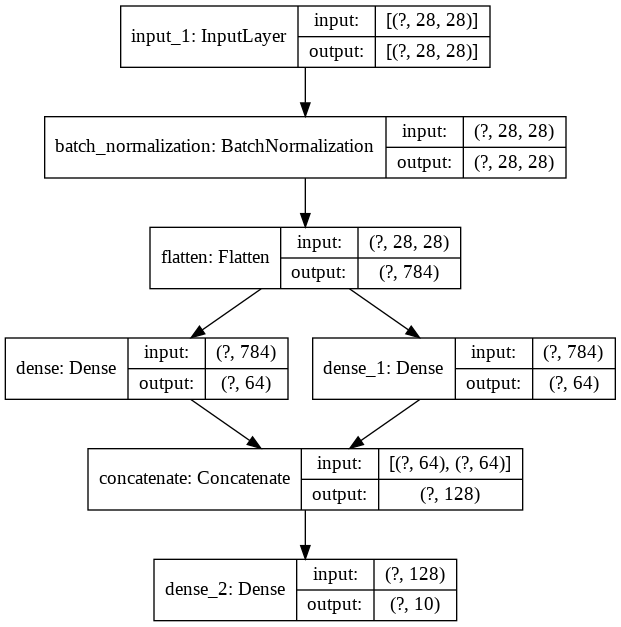

In [ ]:
K.clear_session()
#Creating a model on a functional API

#Input layer
visible = tensorflow.keras.layers.Input(shape=[28,28])
bn = tensorflow.keras.layers.BatchNormalization()(visible)
#flatten layer, converts 28x28 to 784 pixels
flat = tensorflow.keras.layers.Flatten()(bn)
#First Dense Layer
hidden1 = tensorflow.keras.layers.Dense(64, activation = 'relu')(flat)

#second dense layer
hidden2 = tensorflow.keras.layers.Dense(64, activation='relu')(flat)

#concatenate both hidden layers
merge = tensorflow.keras.layers.concatenate([hidden1, hidden2])

#output layer
output = tensorflow.keras.layers.Dense(10, activation='softmax')(merge)
#Final model
m6 = tensorflow.keras.Model(inputs=visible, outputs=output)
#Summarization
print(m6.summary())
#Plotting the model
plot_model(m6, to_file='model1.png', show_shapes=True)


m6.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  optimizer=Adam(),
                  metrics=['accuracy'])

In [ ]:
h6 = m6.fit(train_images, train_labels, validation_data=(train_images,train_labels), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6463 - accuracy: 0.8168 - val_loss: 1.6225 - val_accuracy: 0.8393
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6130 - accuracy: 0.8484 - val_loss: 1.5966 - val_accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5994 - accuracy: 0.8615 - val_loss: 1.5977 - val_accuracy: 0.8632
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5950 - accuracy: 0.8661 - val_loss: 1.5957 - val_accuracy: 0.8648
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5876 - accuracy: 0.8734 - val_loss: 1.5861 - val_accuracy: 0.8748
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5837 - accuracy: 0.8774 - val_loss: 1.5724 - val_accuracy: 0.8883
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5801 - accuracy: 0.8809 - val_loss: 1.5695 - val_accuracy:

313/313 - 0s - loss: 1.6012 - accuracy: 0.8588

Test accuracy: 0.8587999939918518


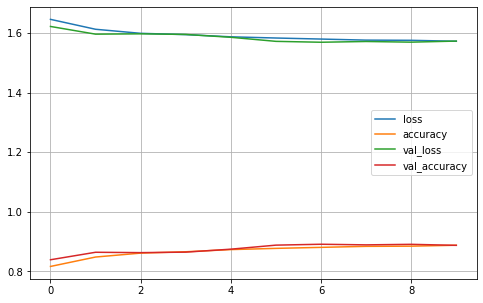

In [ ]:
#Evaluating accuracy
test_loss, test_acc = m6.evaluate(test_images, test_labels, verbose = 2)
print('\nTest accuracy:', test_acc)

pd.DataFrame(h6.history).plot(figsize=(8,5), ls='-')
plt.grid(True)
plt.gca()
plt.show();

## Model 7  Model with Dropout

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten (Flatten)               (None, 784)          0           input_1[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 64)           50240       flatten[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 64)           50240       flatten[0][0]                    
______________________________________________________________________________________________

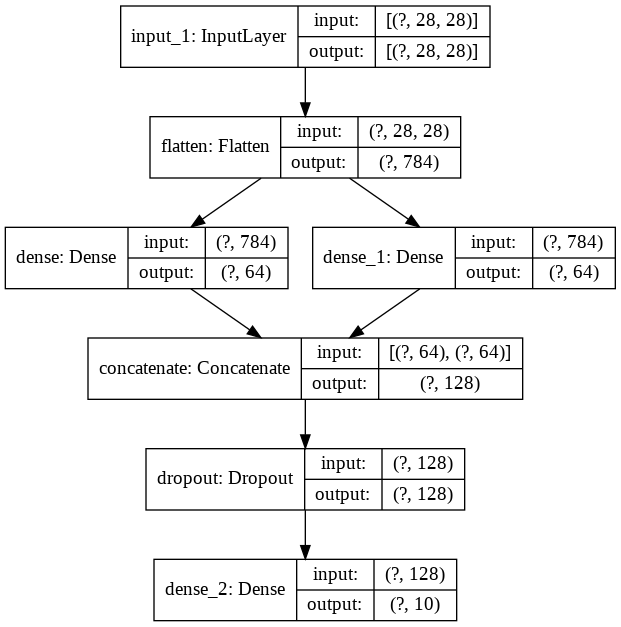

In [ ]:
K.clear_session()
#Creating a model on a functional API

#Input layer
visible = tensorflow.keras.layers.Input(shape=[28,28])
#flatten layer, converts 28x28 to 784 pixels
flat = tensorflow.keras.layers.Flatten()(visible)
#First Dense Layer
hidden1 = tensorflow.keras.layers.Dense(64, activation = 'relu')(flat)

#second dense layer
hidden2 = tensorflow.keras.layers.Dense(64, activation='relu')(flat)

#concatenate both hidden layers
merge = tensorflow.keras.layers.concatenate([hidden1, hidden2])
drop = tensorflow.keras.layers.Dropout(0.25)(merge)
#output layer
output = tensorflow.keras.layers.Dense(10, activation='softmax')(drop)
#Final model
m7 = tensorflow.keras.Model(inputs=visible, outputs=output)
#Summarization
print(m7.summary())
#Plotting the model
plot_model(m7, to_file='model1.png', show_shapes=True)






In [ ]:
m7.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  optimizer=Adam(),
                  metrics=['accuracy'])

h7 = m7.fit(train_images, train_labels, validation_data=(train_images,train_labels), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6843 - accuracy: 0.7874 - val_loss: 1.6269 - val_accuracy: 0.8385
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6295 - accuracy: 0.8351 - val_loss: 1.6144 - val_accuracy: 0.8488
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6182 - accuracy: 0.8444 - val_loss: 1.6030 - val_accuracy: 0.8597
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6097 - accuracy: 0.8528 - val_loss: 1.6027 - val_accuracy: 0.8600
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6064 - accuracy: 0.8555 - val_loss: 1.6053 - val_accuracy: 0.8560
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6013 - accuracy: 0.8608 - val_loss: 1.5871 - val_accuracy: 0.8745
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5984 - accuracy: 0.8633 - val_loss: 1.5919 - val_accuracy:

313/313 - 0s - loss: 1.5973 - accuracy: 0.8649

Test accuracy: 0.8648999929428101


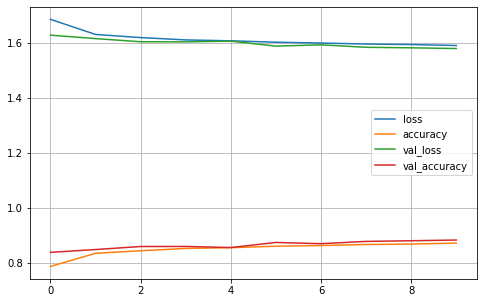

In [ ]:
#Evaluating accuracy
test_loss, test_acc = m7.evaluate(test_images, test_labels, verbose = 2)
print('\nTest accuracy:', test_acc)

pd.DataFrame(h7.history).plot(figsize=(8,5), ls='-')
plt.grid(True)
plt.gca()
plt.show();

## Model 8: Batch Normalization on a different layer

* In this model I was interested in knowing what would happen if I apply Batch normalization on the layers where the splits occur instead of after the `Flatten()` step.

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten (Flatten)               (None, 784)          0           input_1[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 64)           50240       flatten[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 64)           50240       flatten[0][0]                    
______________________________________________________________________________________________

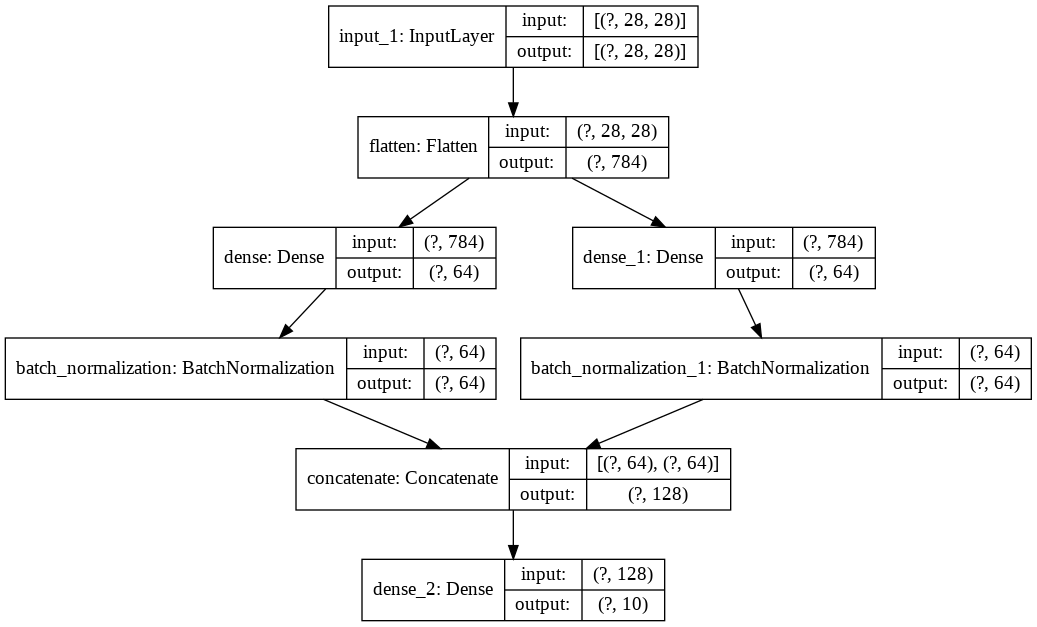

In [ ]:
K.clear_session()
#Creating a model on a functional API

#Input layer
visible = tensorflow.keras.layers.Input(shape=[28,28])

#flatten layer, converts 28x28 to 784 pixels
flat = tensorflow.keras.layers.Flatten()(visible)
#First Dense Layer
hidden1 = tensorflow.keras.layers.Dense(64, activation = 'relu')(flat)
hidden1= tensorflow.keras.layers.BatchNormalization()(hidden1)
#second dense layer
hidden2 = tensorflow.keras.layers.Dense(64, activation='relu')(flat)
hidden2= tensorflow.keras.layers.BatchNormalization()(hidden2)
#concatenate both hidden layers
merge = tensorflow.keras.layers.concatenate([hidden1, hidden2])

#output layer
output = tensorflow.keras.layers.Dense(10, activation='softmax')(merge)
#Final model
m8 = tensorflow.keras.Model(inputs=visible, outputs=output)
#Summarization
print(m8.summary())
#Plotting the model
plot_model(m8, to_file='model1.png', show_shapes=True)

In [ ]:
m8.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  optimizer=Adam(),
                  metrics=['accuracy'])

h8 = m8.fit(train_images, train_labels, validation_data=(train_images,train_labels), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6527 - accuracy: 0.8231 - val_loss: 1.6352 - val_accuracy: 0.8333
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6158 - accuracy: 0.8521 - val_loss: 1.6071 - val_accuracy: 0.8600
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6085 - accuracy: 0.8586 - val_loss: 1.6207 - val_accuracy: 0.8463
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6020 - accuracy: 0.8646 - val_loss: 1.5900 - val_accuracy: 0.8751
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5956 - accuracy: 0.8698 - val_loss: 1.5942 - val_accuracy: 0.8704
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5933 - accuracy: 0.8716 - val_loss: 1.5906 - val_accuracy: 0.8735
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5915 - accuracy: 0.8735 - val_loss: 1.5864 - val_accuracy:

313/313 - 0s - loss: 1.5963 - accuracy: 0.8656

Test accuracy: 0.8655999898910522


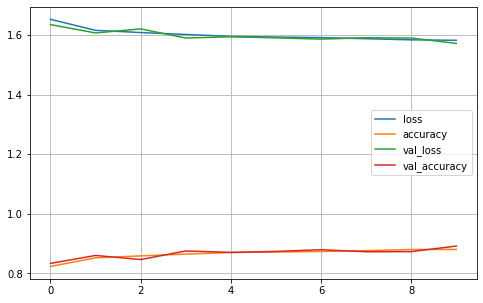

In [ ]:
#Evaluating accuracy
test_loss, test_acc = m8.evaluate(test_images, test_labels, verbose = 2)
print('\nTest accuracy:', test_acc)

pd.DataFrame(h8.history).plot(figsize=(8,5), ls='-')
plt.grid(True)
plt.gca()
plt.show();

## Model 9 Comparing initializers

In [ ]:
inilist = []

initializers = ['zeros', 'uniform', 'normal',
                'he_normal', 'lecun_uniform', 'glorot_uniform']

for init in initializers:
  K.clear_session()
  #Input layer
  visible = tensorflow.keras.layers.Input(shape=[28,28])
  #flatten layer, converts 28x28 to 784 pixels
  flat = tensorflow.keras.layers.Flatten()(visible)
  #First Dense Layer
  hidden1 = tensorflow.keras.layers.Dense(64, activation = 'relu', kernel_initializer=init)(flat)

  #second dense layer
  hidden2 = tensorflow.keras.layers.Dense(64, activation='relu', kernel_initializer=init)(flat)

  #concatenate both hidden layers
  merge = tensorflow.keras.layers.concatenate([hidden1, hidden2])

  #output layer
  output = tensorflow.keras.layers.Dense(10, activation = 'softmax')(merge)
  #Final model
  m9 = tensorflow.keras.Model(inputs=visible, outputs=output)

  m9.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  optimizer=Adam(learning_rate=lr),
                  metrics=['accuracy'])
  
  h9 = m9.fit(train_images,train_labels, epochs = 10, validation_data = (test_images, test_labels))
  inilist.append(pd.DataFrame(h9.history, index=h9.epoch))




  m9.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  optimizer=Adam(),
                  metrics=['accuracy'])
  
  h9 = m9.fit(train_images,train_labels, epochs = 10, validation_data = (test_images, test_labels))
  inilist.append(pd.DataFrame(h9.history, index=h9.epoch))



Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3586 - accuracy: 0.0999 - val_loss: 2.3611 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3612 - accuracy: 0.1000 - val_loss: 2.3611 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3612 - accuracy: 0.1000 - val_loss: 2.3611 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3612 - accuracy: 0.1000 - val_loss: 2.3611 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3612 - accuracy: 0.1000 - val_loss: 2.3611 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3612 - accuracy: 0.1000 - val_loss: 2.3611 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3612 - accuracy: 0.1000 - val_loss: 2.3611 - val_accuracy:

In [ ]:
inidf = pd.concat(inilist, axis=1)

imetrics = inilist[0].columns
idx = pd.MultiIndex.from_product([initializers, imetrics],
                                 names = ['Batch Size', 'Metrics'])
inidf.columns = idx

inidf


ValueError: ignored

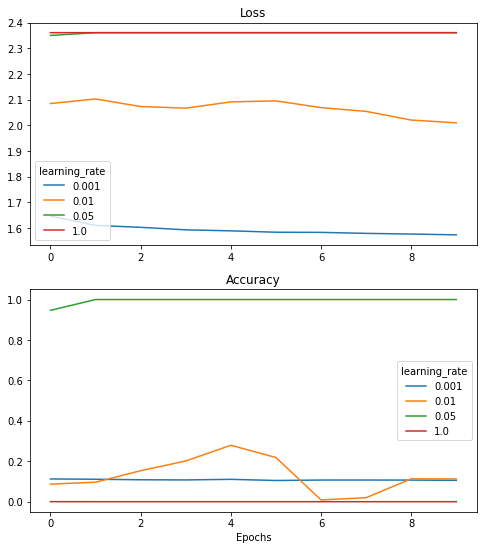

10000/10000 [==============================] - 0s 35us/step

Test accuracy: 0.0


In [ ]:
ax = plt.subplot(211)
lrdf2.xs('loss', axis=1, level='metrics').plot(ax=ax,figsize=(8, 9), ls='-')
plt.title("Loss")

ax = plt.subplot(212)
lrdf2.xs('accuracy', axis=1, level='metrics').plot(ax=ax,figsize=(8, 9), ls='-')
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.show()

test_loss, test_acc = m9.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc);

## Model 10 The best model for now

* The following model will be built using 




1.   Batch size = 64
2.   Learning Rate = 0.001
3.  Optimizer = `RMSprop()`

* Compared to the first model, accuracy increased from 80% to 87% on the validation set.




In [ ]:
K.clear_session()
#Creating a model on a functional API

#Input layer
visible = tensorflow.keras.layers.Input(shape=[28,28])
#flatten layer, converts 28x28 to 784 pixels
flat = tensorflow.keras.layers.Flatten()(visible)
#First Dense Layer
hidden1 = tensorflow.keras.layers.Dense(64, activation = 'relu')(flat)

#second dense layer
hidden2 = tensorflow.keras.layers.Dense(64, activation='relu')(flat)

#concatenate both hidden layers
merge = tensorflow.keras.layers.concatenate([hidden1, hidden2])

#output layer
output = tensorflow.keras.layers.Dense(10, activation='softmax')(merge)
#Final model
model10 = tensorflow.keras.Model(inputs=visible, outputs=output)
#Summarization
print(model10.summary())


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten (Flatten)               (None, 784)          0           input_1[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 64)           50240       flatten[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 64)           50240       flatten[0][0]                    
______________________________________________________________________________________________

In [ ]:

model10.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=0.001),
                  metrics=['accuracy'])

h10 = model10.fit(train_images, train_labels, batch_size = 64, 
                 validation_data=(train_images,train_labels), epochs = 10)

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 1.5691 - accuracy: 0.8924 - val_loss: 1.5621 - val_accuracy: 0.8998
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 1.5669 - accuracy: 0.8952 - val_loss: 1.5643 - val_accuracy: 0.8974
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 1.5646 - accuracy: 0.8977 - val_loss: 1.5625 - val_accuracy: 0.8999
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 1.5633 - accuracy: 0.8985 - val_loss: 1.5603 - val_accuracy: 0.9013
Epoch 5/10
938/938 [==============================] - 4s 5ms/step - loss: 1.5620 - accuracy: 0.9003 - val_loss: 1.5553 - val_accuracy: 0.9063
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 1.5617 - accuracy: 0.8999 - val_loss: 1.5604 - val_accuracy: 0.9011
Epoch 7/10
938/938 [==============================] - 4s 5ms/step - loss: 1.5605 - accuracy: 0.9010 - val_loss: 1.5584 - val_accuracy: 0.9033
Epoch 

In [ ]:
#Evaluating accuracy
test_loss, test_acc = model10.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)

pd.DataFrame(h10.history).plot(figsize=(8,5), ls='-')
plt.grid(True)
plt.gca()
plt.show();

NameError: ignored